In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [15]:
np.random.seed(7)

In [16]:
path = '/Users/joannakang/Desktop/machinelearning/final_data.csv'

In [17]:
df = pd.read_csv(path)

In [18]:
df.head()

,time,usage,STN_ID,TM,LAT,LON,HT,WD,WS,TA,...,PA,PS,RN_YN,RN_1HR,RN_DAY,RN_15M,RN_60M,WD_INS,WS_INS,unknown
0,01/08/2014 00:15,454.56,406.0,2.010000e+11,37.6661,127.0295,55.5,2764.0,2.0,230.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,2616.0,4.0,=
1,01/08/2014 00:30,440.88,406.0,2.010000e+11,37.6661,127.0295,55.5,3173.0,9.0,228.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3150.0,10.0,=
2,01/08/2014 00:45,438.00,406.0,2.010000e+11,37.6661,127.0295,55.5,54.0,1.0,228.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3431.0,2.0,=
3,01/08/2014 01:00,447.84,406.0,2.010000e+11,37.6661,127.0295,55.5,3426.0,1.0,227.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3375.0,4.0,=
4,01/08/2014 01:15,459.36,406.0,2.010000e+11,37.6661,127.0295,55.5,3312.0,0.0,229.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3291.0,1.0,=


In [19]:
df = df[['usage', 'TA', 'WS', 'HM']]

In [20]:
df

,usage,TA,WS,HM
0,454.56,230.0,2.0,999.0
1,440.88,228.0,9.0,999.0
2,438.00,228.0,1.0,999.0
3,447.84,227.0,1.0,999.0
4,459.36,229.0,0.0,999.0
5,438.96,227.0,0.0,999.0
6,437.52,226.0,3.0,999.0
7,435.60,227.0,0.0,999.0
8,453.60,226.0,0.0,999.0
9,432.00,225.0,0.0,999.0


In [21]:
x_train = df[['WS', 'TA', 'HM']][0:30000]
y_train = df['usage'][0:30000]

In [22]:
#모델을 튜닝할때 쓰는 데이터 : Validation set
x_val = df[['WS', 'TA', 'HM']][30000:32000]
y_val = df['usage'][30000:32000]

In [23]:
#모델의 정확도를 테스트하는 데이터 : test set
x_test = df[['WS', 'TA', 'HM']][32000:]
y_test = df['usage'][32000:]

In [24]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    #dense=히든레이어 노드의 갯수, input_shape=인풋데이터
    t_model.add(Dense(3, activation="linear", input_shape=(x_size,)))
    #x_size 이후부터는 히든레이어를 정의
    #t_model.add(Dense(7, activation="linear"))
    #t_model.add(Dense(3, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(lr=1e-3, decay=0.0),
        metrics=['accuracy'])
    return(t_model)

In [25]:
model = deep_learning_model_1(x_train.shape[1], 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
epochs = 10
batch_size = 10

print('Epochs: ', epochs)
print('Batch_size: ', batch_size)

Epochs:  10
Batch_size:  10


In [27]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, validation_data = (x_val, y_val))

Train on 30000 samples, validate on 2000 samples
Epoch 1/10
30000/30000 [==============================] - 3s 84us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
30000/30000 [==============================] - 2s 78us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
30000/30000 [==============================] - 2s 78us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
27830/30000 [==========================>...] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [50]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

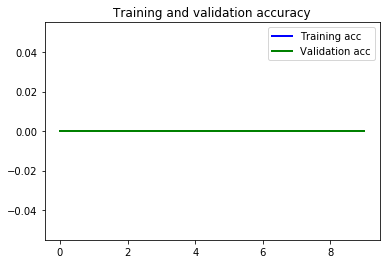

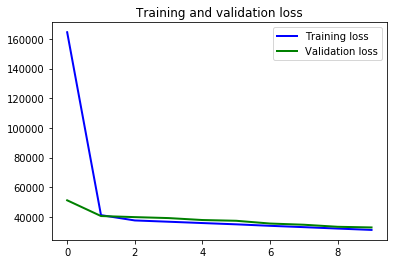

In [52]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()